# Cars Dataset

## Importing libraries

In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import math

## Loading data

In [156]:
le=LabelEncoder()

In [229]:
dfX = pd.read_csv('dataset_files/car_X_train.csv')
for i in dfX.columns:
    dfX[i]=le.fit_transform(dfX[i])

X_tr = dfX.to_numpy()
dfX

,buying,maint,doors,persons,lug_boot,safety
0,2,2,3,1,0,0
1,0,0,1,2,2,1
2,1,2,1,1,1,2
3,2,2,3,0,0,0
4,2,0,2,0,0,2
...,...,...,...,...,...,...
1204,2,2,1,2,1,0
1205,2,1,3,2,0,2
1206,0,1,3,2,1,0
1207,1,0,2,0,2,2


In [230]:
y = pd.read_csv('dataset_files/car_y_train.csv')
for i in y:
    y[i]=le.fit_transform(y[i])
y_tr = y.to_numpy()
y_tr2 = np.ravel(y_tr)
y_tr2

array([3, 2, 0, ..., 0, 2, 0])

In [231]:
dfX_t = pd.read_csv('dataset_files/car_X_test.csv')
for i in dfX_t.columns:
    dfX_t[i]=le.fit_transform(dfX_t[i])

X_test = dfX_t.to_numpy()
X_test

array([[0, 0, 2, 0, 1, 0],
       [2, 1, 0, 1, 1, 2],
       [0, 0, 3, 0, 0, 2],
       ...,
       [3, 2, 2, 1, 0, 0],
       [1, 1, 0, 2, 2, 2],
       [1, 1, 3, 1, 1, 2]])

In [232]:
y_t = pd.read_csv('dataset_files/car_y_test.csv')
for i in y_t:
    y_t[i]=le.fit_transform(y_t[i])
y_test = y_t.to_numpy()
y_test2 = np.ravel(y_test)
y_test2

array([2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 3,
       2, 0, 0, 2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 2, 0, 2, 3, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 3, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0,
       3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 3, 2, 2, 2, 0, 2, 2, 3, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 1, 3, 0, 0, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2,

## Logistic Regression Method

In [290]:
class LogisticRegressionMethod(object):
    # we are assigning C parameter when initializing in order to perform a very simple regularization 
    def __init__(self, eta=0.01, iterations_num=1000, random_state=1, C=0.01):
        self.eta = eta
        self.iterations_num = iterations_num
        self.random_state = random_state
        self.C = C 
        self.coef_ = []

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.w = []
        m = X.shape[0]
        # this loop functions in order to transform our method from binary into Multi-Class. 
        # we are using a One vs Rest method where the y_2 is the transformed version  
        # 2 of the classes are treated as one - since np.unique developed a class array, which allows us to run the the LR Model
        for i in np.unique(y):
            y_2 = np.where(y == i, 1, 0)
            w = np.ones(X.shape[1])
            # the inner for-loop defines the error function - err, the weights and assigns them to the class label
            for _ in range(self.iterations_num):
                output = X.dot(w)
                err = y_2 - self._sigmoid(output)
                # a regularization term is added to the cost function which will shrink the weights during model training
                w += (self.eta / m) * err.dot(X) - self.C*sum(np.power(w, 2)) * (self.eta / m)
            self.w.append((w, i))
        self.coef_ = w
        return self
    # in order to adjust the predict functions we'll need to introduce a new _pred_1 function which would work
    # for each instance separately and agreggated them later by predict function
    def _pred_1(self, x):
        return max((x.dot(w), c) for w, c in self.w)[1]
    def predict(self, X):
        return np.array([self._pred_1(i) for i in np.insert(X, 0, 1, axis=1)])
    # a simple score function used in many LR models
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

## Standardization of X data 

In order to standardize the X data we'll use a simple sklearn function. Although not specifically allowed, this function stays out of the scope of model design and therefore, with my assumption that it's not a crucial element in learning to design models from scratch, is used to simplify the process here

In [269]:
standardized_X = preprocessing.scale(X_tr)
standardized_X_test = preprocessing.scale(X_test)
standardized_X 

array([[ 0.43665601,  0.44315443,  1.34600219, -0.00511298, -1.22301629,
        -1.2097176 ],
       [-1.35289354, -1.34275791, -0.42957517,  1.23120614,  1.21294202,
         0.01828289],
       [-0.45811877,  0.44315443, -0.42957517, -0.00511298, -0.00503713,
         1.24628337],
       ...,
       [-1.35289354, -0.44980174,  1.34600219,  1.23120614, -0.00503713,
        -1.2097176 ],
       [-0.45811877, -1.34275791,  0.45821351, -1.2414321 ,  1.21294202,
         1.24628337],
       [ 0.43665601,  0.44315443, -0.42957517,  1.23120614,  1.21294202,
         1.24628337]])

## Fitting and Plotting

<ipython-input-290-a6a2d2aabcb6>:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-290-a6a2d2aabcb6>:25: RuntimeWarning: overflow encountered in power
  w += (self.eta / m) * err.dot(X) - self.C*sum(np.power(w, 2)) * (self.eta / m)


<function matplotlib.pyplot.show(close=None, block=None)>

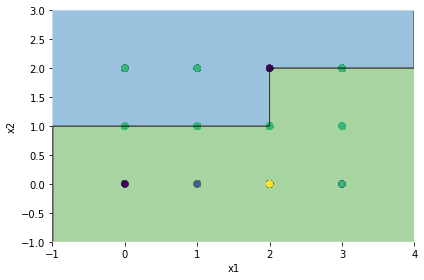

In [326]:
# Fitting our Logistic Regression Method model to the Training set 
# Using regularization term of 100
lr = LogisticRegressionMethod(C=100)
lr.fit(X_tr, y_tr2)
# Plotting against a decision region of 2 features - petal length and petal width
plot_decision_regions(X=X_tr,
                      y=y_tr2,
                      clf=lr, 
                      feature_index=[1,3], 
                      filler_feature_values={5: 0, 0: 0, 2: 0, 4: 0})
# using 2 standardized features - 3 and 4 from our X numpy array
plt.scatter(X_tr[:, 0], X_tr[:, 5], c=y_tr2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show

## Let's observe the behavior of sklearn's Logistic Regression model 

Observing sklearn's model we can see that the model coded from scratch only shows a binary region for the same parameters. Although, we should note that it is indeed multi-class and worked nicely with the Iris dataset.

<function matplotlib.pyplot.show(close=None, block=None)>

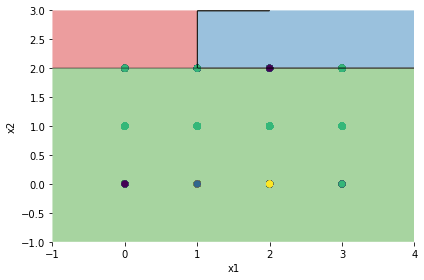

In [325]:
lr2 = LogisticRegression()
lr2.fit(X_tr, y_tr2)
# Plotting against a decision region of 2 features - petal length and petal width
plot_decision_regions(X=X_tr,
                      y=y_tr2,
                      clf=lr2, 
                      feature_index=[1,3], 
                      filler_feature_values={4: 0, 0: 0, 5: 0, 2: 0})
# using 2 standardized features - 3 and 4 from our X numpy array
plt.scatter(X_tr[:, 0], X_tr[:, 5], c=y_tr2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show

## Comparing my model with sklearn's 

We can observe that the model implemented from scratch achieves better results with the parametres defined. Howver, the parametres are extremely important. Therefore, our main is not to compare both models here but just to mention that, although quite a low result, it is still significantly better than a random score. 

In [317]:
print(lr.score(standardized_X, y_tr2))
print(lr.score(standardized_X_test, y_test2))

0.6418527708850289
0.628131021194605


In [296]:
print(lr2.score(standardized_X, y_tr2))
print(lr2.score(standardized_X_test, y_test2))

0.5748552522746071
0.5645472061657033


## Random Forest 

### Method definition

In [225]:
class RandomForestMethod():
    # Defining the parameteres of our forest
    def __init__(self, x, y, trees_num, feat_num, sample_size, depth=10, min_leaf=5):
        np.random.seed(5)
        self.feat_num = feat_num
        self.x, self.y, self.sample_size, self.depth, self.min_leaf  = x, y, sample_size, depth, min_leaf
        # In order to create a specified trees number
        self.trees = [self.create_tree() for i in range(trees_num)]

    def create_tree(self):
        r_indices = np.random.permutation(len(self.y))[:self.sample_size]
        f_r_indices = np.random.permutation(self.x.shape[1])[:self.feat_num]
        # An instance of the DecisionTree class. This part is to make the bagging work.
        # Bagging is used both for features and trees themselves
        return DecisionTree(self.x[r_indices], self.y[r_indices], self.feat_num, f_r_indices,
                    r_indices=np.array(range(self.sample_size)),depth = self.depth, min_leaf=self.min_leaf)
    
    # Common preduction function which is just the average of individual decision trees    
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)
    
#calculate standard deviation using math library
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

### Individual Decision Tree Class

In [226]:
class DecisionTree():
    #r_indices means the indices of rows
    def __init__(self, x, y, feat_num, f_r_indices,r_indices,depth=10, min_leaf=5):
        self.x, self.y, self.r_indices, self.min_leaf, self.f_r_indices = x, y, r_indices, min_leaf, f_r_indices
        self.depth = depth
        self.feat_num = feat_num
        self.n, self.c = len(r_indices), x.shape[1]
        self.val = np.mean(y[r_indices])
        self.score = float('inf')
        self.brute_split()
    
    # This is used to find an individual split with a brute force.
    def brute_split(self):
        for i in self.f_r_indices: self.best_split(i)
        if self.leaf_node: return
        x = self.column_indxs
        left_side = np.nonzero(x<=self.split)[0]
        right_side = np.nonzero(x>self.split)[0]
        lf_r_indices = np.random.permutation(self.x.shape[1])[:self.feat_num]
        rf_r_indices = np.random.permutation(self.x.shape[1])[:self.feat_num]
        self.left_side = DecisionTree(self.x, self.y, self.feat_num, lf_r_indices, self.r_indices[left_side], depth=self.depth-1, min_leaf=self.min_leaf)
        self.right_side = DecisionTree(self.x, self.y, self.feat_num, rf_r_indices, self.r_indices[right_side], depth=self.depth-1, min_leaf=self.min_leaf)
    
    
    def best_split(self, v_index):
        x, y = self.x[self.r_indices,v_index], self.y[self.r_indices]
        sort_index = np.argsort(x)
        sort_y,sort_x = y[sort_index], x[sort_index]
        right_side_cnt,right_side_sum,right_side_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        left_side_cnt,left_side_sum,left_side_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            left_side_cnt += 1; right_side_cnt -= 1
            left_side_sum += yi; right_side_sum -= yi
            left_side_sum2 += yi**2; right_side_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            left_side_std = std_agg(left_side_cnt, left_side_sum, left_side_sum2)
            right_side_std = std_agg(right_side_cnt, right_side_sum, right_side_sum2)
            curr_score = left_side_std*left_side_cnt + right_side_std*right_side_cnt
            if curr_score<self.score: 
                self.v_index,self.score,self.split = v_index,curr_score,xi
    

    
    # property decorator is used
    @property
    def column_indxs(self): return self.x[self.r_indices,self.v_index]

    @property
    # leafs with infinity scores
    def leaf_node(self): return self.score == float('inf') or self.depth <= 0 

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.leaf_node: return self.val
        t = self.left_side if xi[self.v_index]<=self.split else self.right_side
        return t.predict_row(xi)

## Plotting the Forest

<function matplotlib.pyplot.show(close=None, block=None)>

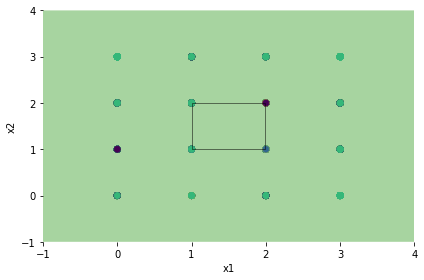

In [329]:
# Defining the parameters of our method's instance
forest = RandomForestMethod(x = X_tr, y=y_tr2, min_leaf=5, trees_num=100, feat_num = 5, sample_size = 20)

# Plotting the same features as in logistic regression, changing the previousl used 'lr' to our newly defined random 'forest'
plot_decision_regions(X=X_tr,
                      y=y_tr2,
                      clf=forest, 
                      feature_index=[0,1], 
                      filler_feature_values={2: 0, 3: 0, 4: 0, 5: 0})
# using 2 standardized features - 3 and 4 from our X numpy array
plt.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show

For this pair of features it's hard to find a convex regions of points - RF will have a lot of troubles separating these regios. 

In [228]:
forest.predict(X_test)

array([1.9376461 , 1.19793279, 1.92115801, 1.07590285, 1.69712987,
       1.22160956, 1.41582179, 1.91782468, 1.35053272, 1.95609848,
       1.13048052, 1.12486147, 1.3617132 , 1.94136905, 1.96541667,
       1.94338095, 1.11254715, 1.93234848, 1.93234848, 1.09502947,
       1.95943182, 1.27104437, 1.22648124, 1.91964286, 1.29414286,
       1.28577081, 1.21300758, 1.97714286, 1.95056277, 1.95193182,
       1.2439685 , 1.96855952, 1.28656133, 1.93525325, 1.07936244,
       1.16522464, 1.0877286 , 1.65755267, 1.63956061, 1.99246753,
       1.98961039, 1.61479076, 1.22657168, 1.14562254, 1.21974639,
       1.14369661, 1.91341991, 1.68820022, 1.93641667, 1.96484848,
       1.28298557, 1.94859848, 1.17349917, 1.94078896, 1.26959296,
       1.68354437, 1.95108658, 1.98961039, 1.99532468, 1.1298022 ,
       1.99714286, 1.15807781, 1.95308333, 1.79418939, 1.30667052,
       1.16468615, 1.68284271, 1.27738853, 1.08760847, 1.71389574,
       1.95056277, 1.65426263, 1.99428571, 1.71522367, 1.18538